---
#   **Task 1**

In [2]:
import pandas as pd

df = pd.read_csv("advertising.csv")

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#   Statistics and Summary of each column

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
#   Data Cleaning

sumOfNull = df.isna().sum()

sumOfNull = sumOfNull['Sales'] + sumOfNull['TV'] + sumOfNull['Newspaper'] + sumOfNull['Radio']

if sumOfNull != 0:
    df = df.dropna()
    sumOfNull = df.isna().sum()
    sumOfNull = sumOfNull['Sales'] + sumOfNull['TV'] + sumOfNull['Newspaper'] + sumOfNull['Radio']
    

print(f"Count of Null Entries: {sumOfNull}")

Count of Null Entries: 0


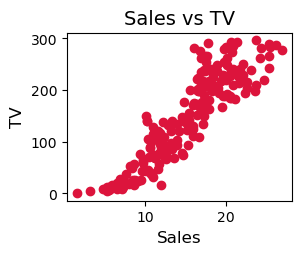

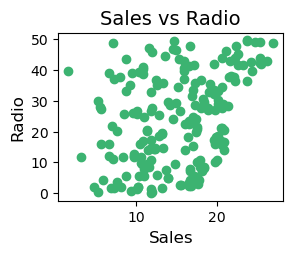

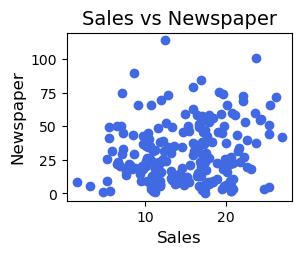

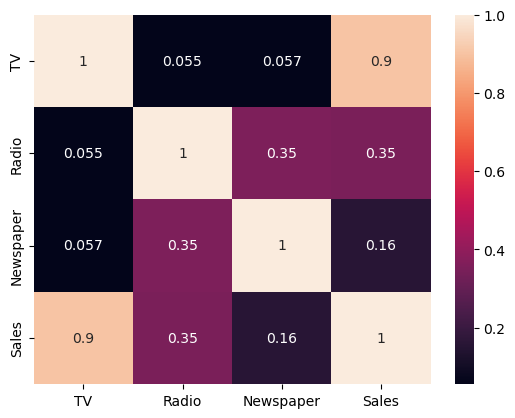

In [23]:
#   Sales Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

def getSalesScatter(file, rel, colour):
    plt.scatter(file['Sales'], df[rel], color = colour)
    plt.title(f"Sales vs {rel}", fontsize = 14)
    plt.xlabel('Sales', fontsize = 12)
    plt.ylabel(f"{rel}", fontsize = 12)
    plt.show()

    return

plt.subplot(2, 2, 1)
getSalesScatter(df, 'TV', 'Crimson')

plt.subplot(2, 2, 2)
getSalesScatter(df, 'Radio', 'MediumSeaGreen')

plt.subplot(2, 2, 3)
getSalesScatter(df, 'Newspaper', 'RoyalBlue')

sns.heatmap(df.corr(), annot = True)    
plt.show()

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def getMaxCorrelation(file):
    maxVal = -1
    maxPair = tuple()
    data = np.array(file.corr())

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i][j] != 1 and data[i][j] > maxVal:
                maxVal = data[i][j]
                maxPair = (i, j)
    
    data = df.corr().to_string().split()
    return (data[maxPair[0]], data[maxPair[1]])

def trainModel(file, col1, col2):
    x = file[[col1]]
    y = file[[col2]]

    trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 0)

    model = LinearRegression()
    model.fit(trainX, trainY)

    predictY = model.predict(testX)

    mse = mean_squared_error(testY, predictY)
    r2 = r2_score(testY, predictY)

    return (mse, r2)

rel1, rel2 = getMaxCorrelation(df)

print(f"Maximum Correlation is between {rel1} and {rel2}")

mse, r2 = trainModel(df, rel1, rel2)

print(f"Mean Squared Error: {mse}")
print(f"R2 Scroe: {r2}")

Maximum Correlation is between TV and Sales
Mean Squared Error: 6.639091226559299
R2 Scroe: 0.8010943934328407


---
#   **Task 2**

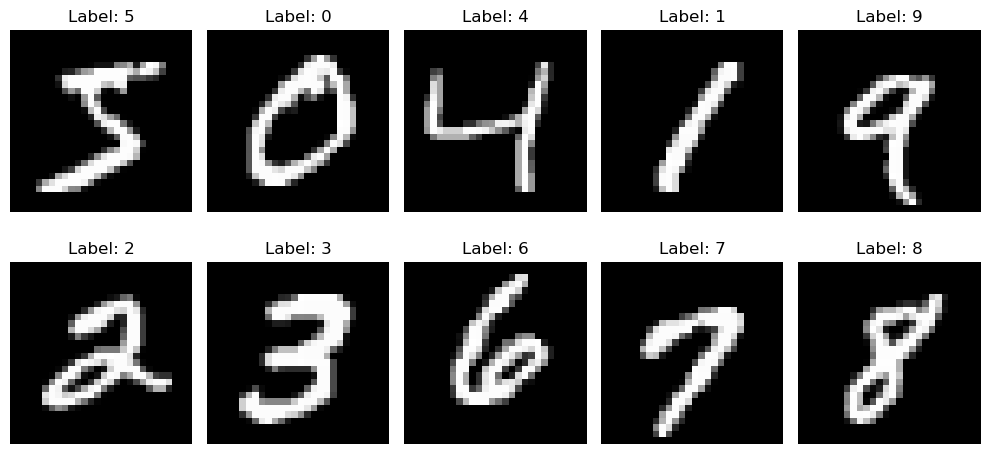

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# 1. Load the data
train_df = pd.read_csv('mnist_train.csv')  # Load the CSV from the downloaded location
test_df = pd.read_csv('mnist_test.csv')

X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# 2. Visualize 10 image samples from the training data (1 per class)
plt.figure(figsize=(10, 5))
shown = set()
i = 0
for idx in range(len(X_train)):
    label = y_train[idx]
    if label not in shown:
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
        shown.add(label)
        i += 1
    if i == 10:
        break
plt.tight_layout()
plt.show()

# 3. Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can try different values for k
knn.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# 5. Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
